# Import necessary packages

In [1]:
import os
os.chdir('E:/github/WeightFormer')
from data import DataTran
from TrainModel import Predict,PlotLoss,Train,dataset_sep
from data import LengthFilter,GetWeight,Pad_data
import torch
import pickle
from Model import WeightFormer
from utils import PlotResults,CalWeights,Test2vec,BulidQSARData,SaveQSARData
from utils import LoadQRSAPredData,CompareOther,LoadPIMData
import matplotlib.pyplot as plt

C:\Users\Administrator\Anaconda3\envs\FDNet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [2]:
with open('EIMSdata/mz_list_train.pickle','rb') as f:
    mz_list_train = pickle.load(f)
with open('EIMSdata/intensity_list_train.pickle','rb') as f:
    intensity_list_train = pickle.load(f)
with open('EIMSdata/weights_train.pickle','rb') as f:
    weights_train = pickle.load(f)
with open('EIMSdata/mz_list_test.pickle','rb') as f:
    mz_list_test = pickle.load(f)
with open('EIMSdata/intensity_list_test.pickle','rb') as f:
    intensity_list_test = pickle.load(f)
with open('EIMSdata/weights_test.pickle','rb') as f:
    weights_test = pickle.load(f)

# Load model

In [5]:
batch_size = 64
lr = 5e-4
epochs = 10
vocab_size = 1000
hidden = 128 
n_layers = 6
attn_heads = 8
dropout = 0


model_file = 'model.pkl'
model = WeightFormer(vocab_size,hidden, n_layers, attn_heads, dropout)
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

# Using the WeightFormer model to obtain prediction results on the test set

695it [00:14, 48.06it/s]


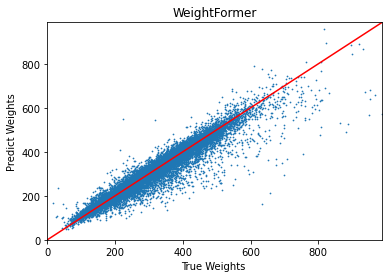

In [7]:
true_weights,predict_weights = Predict(model,mz_list_test,intensity_list_test,weights_test,batch_size)
PlotResults(true_weights,predict_weights,'WeightFormer')

# Calculate evaluation indicators

In [8]:
rmse,mae = CalWeights(true_weights,predict_weights)
print(rmse,mae)

23.240984 11.704885


# Load QSAR model prediction results

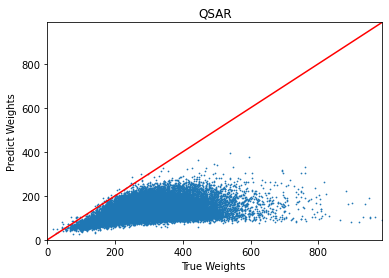

181.5536868099916 158.97751355830954


In [10]:
qrsa_pred_file = 'EIMSdata/result'
pred_result = LoadQRSAPredData(qrsa_pred_file)
rmse_q,mae_q = CompareOther(weights_test,pred_result,'QSAR')
print(rmse_q,mae_q)

# Load PIM model prediction results

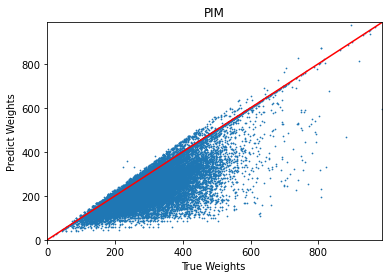

71.78126152695108 37.34888621760451


In [11]:
pim_data_file = 'EIMSdata/pred_mass.npy'
pim_data = LoadPIMData(pim_data_file)
rmse_p,mae_p = CompareOther(weights_test,pim_data,'PIM')
print(rmse_p,mae_p)